# Synthetic Data Generation

### Synthetic data from real data

In [9]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [10]:
X, y = fetch_california_housing(return_X_y=True)

In [11]:
import numpy as np
california_housing=np.column_stack([X, y])
california_housing_df=pd.DataFrame(california_housing)

In [12]:
#pip install ctgan

In [13]:
#!pip install table_evaluator

In [14]:
from ctgan import CTGANSynthesizer


ctgan =CTGANSynthesizer(epochs=10)
ctgan.fit(california_housing_df)
synt_sample = ctgan.sample(len(california_housing_df))

ImportError: cannot import name 'CTGANSynthesizer' from 'ctgan' (/Users/rz/opt/anaconda3/lib/python3.9/site-packages/ctgan/__init__.py)

In [16]:
california_housing_df.describe()

,0,1,2,3,4,5,6,7,8
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [17]:
synt_sample.describe()

NameError: name 'synt_sample' is not defined

In [18]:
from sdv.evaluation import evaluate

evaluate(synt_sample, california_housing_df)

ModuleNotFoundError: No module named 'sdv'

In [19]:
from table_evaluator import TableEvaluator

table_evaluator =  TableEvaluator(california_housing_df, synt_sample)

table_evaluator.visual_evaluation()

ModuleNotFoundError: No module named 'table_evaluator'

### Synthetic data from model

In [20]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from matplotlib import cm

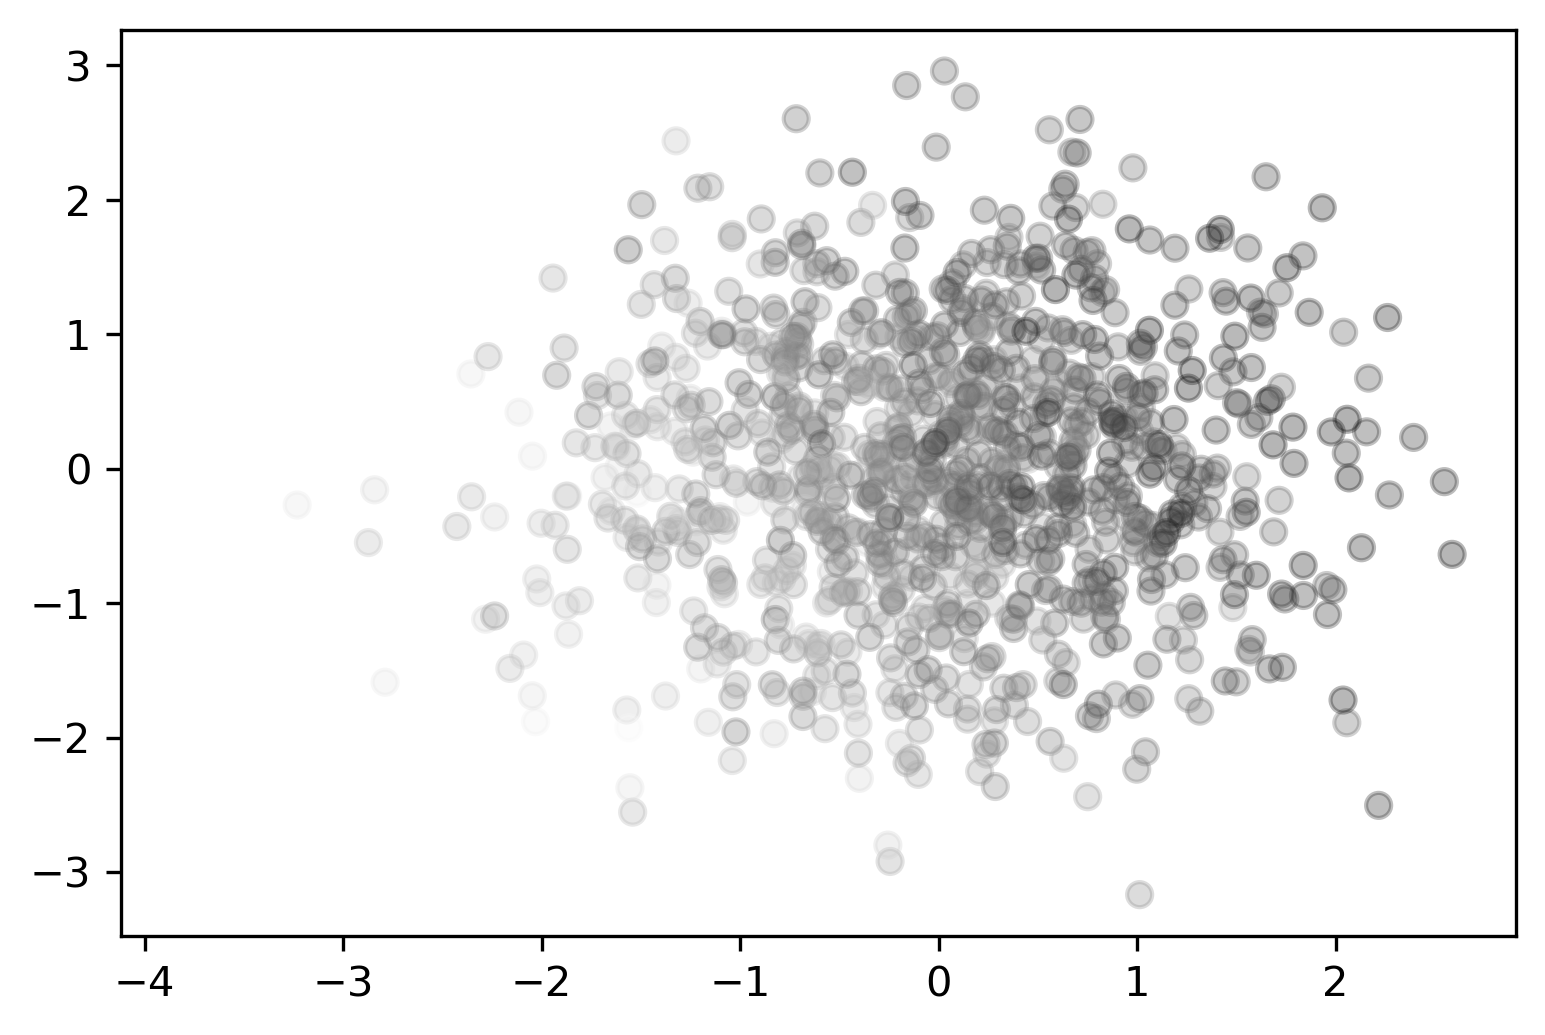

In [21]:
X, y = make_regression(n_samples=1000, n_features=3, noise=0.2,
                       random_state=123)

plt.scatter(X[:, 0], X[:, 1], alpha= 0.3, cmap='Greys', c=y)

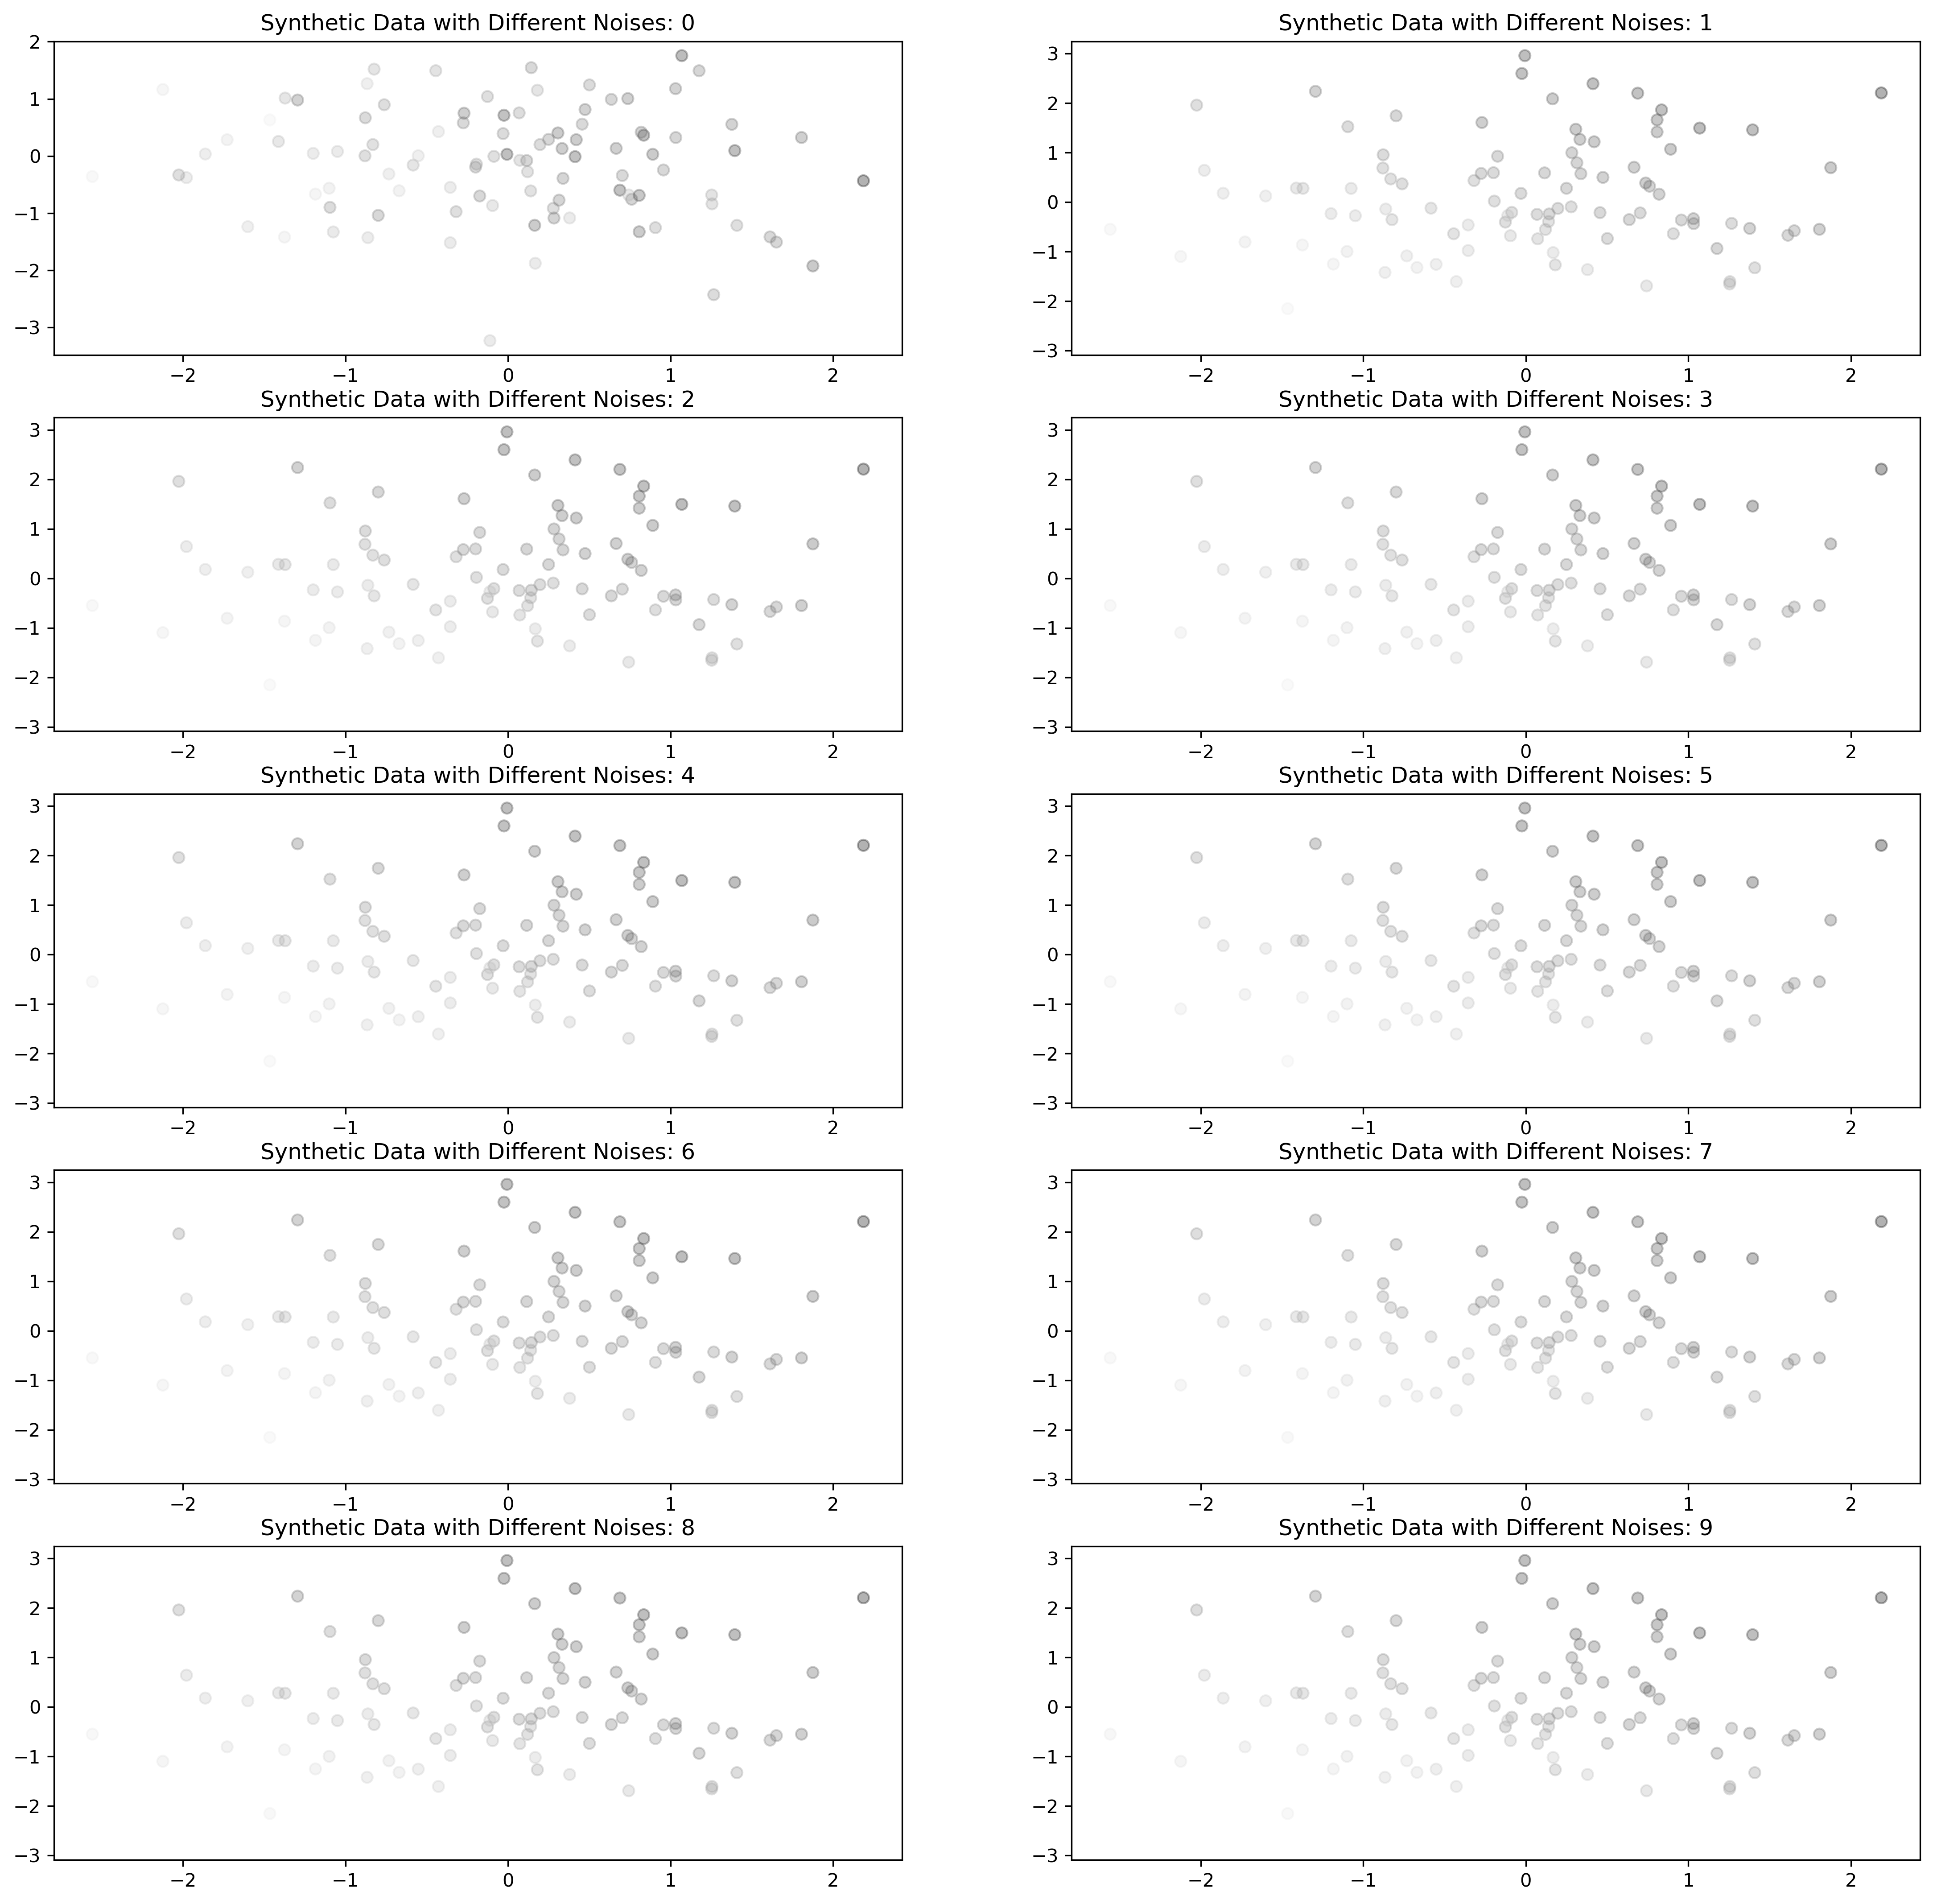

In [22]:
plt.figure(figsize=(18, 18))
k = 0

for i in range(0, 10):
    X, y = make_regression(n_samples=100, n_features=3, noise=i,
                           random_state=123) 
    k+=1
    plt.subplot(5, 2, k)
    profit_margin_orange = np.asarray([20, 35, 40])
    plt.scatter(X[:, 0], X[:, 1], alpha=0.3, cmap=cm.Greys, c=y)
    plt.title('Synthetic Data with Different Noises: ' + str(i))
plt.show()

In [23]:
from sklearn.datasets import make_classification

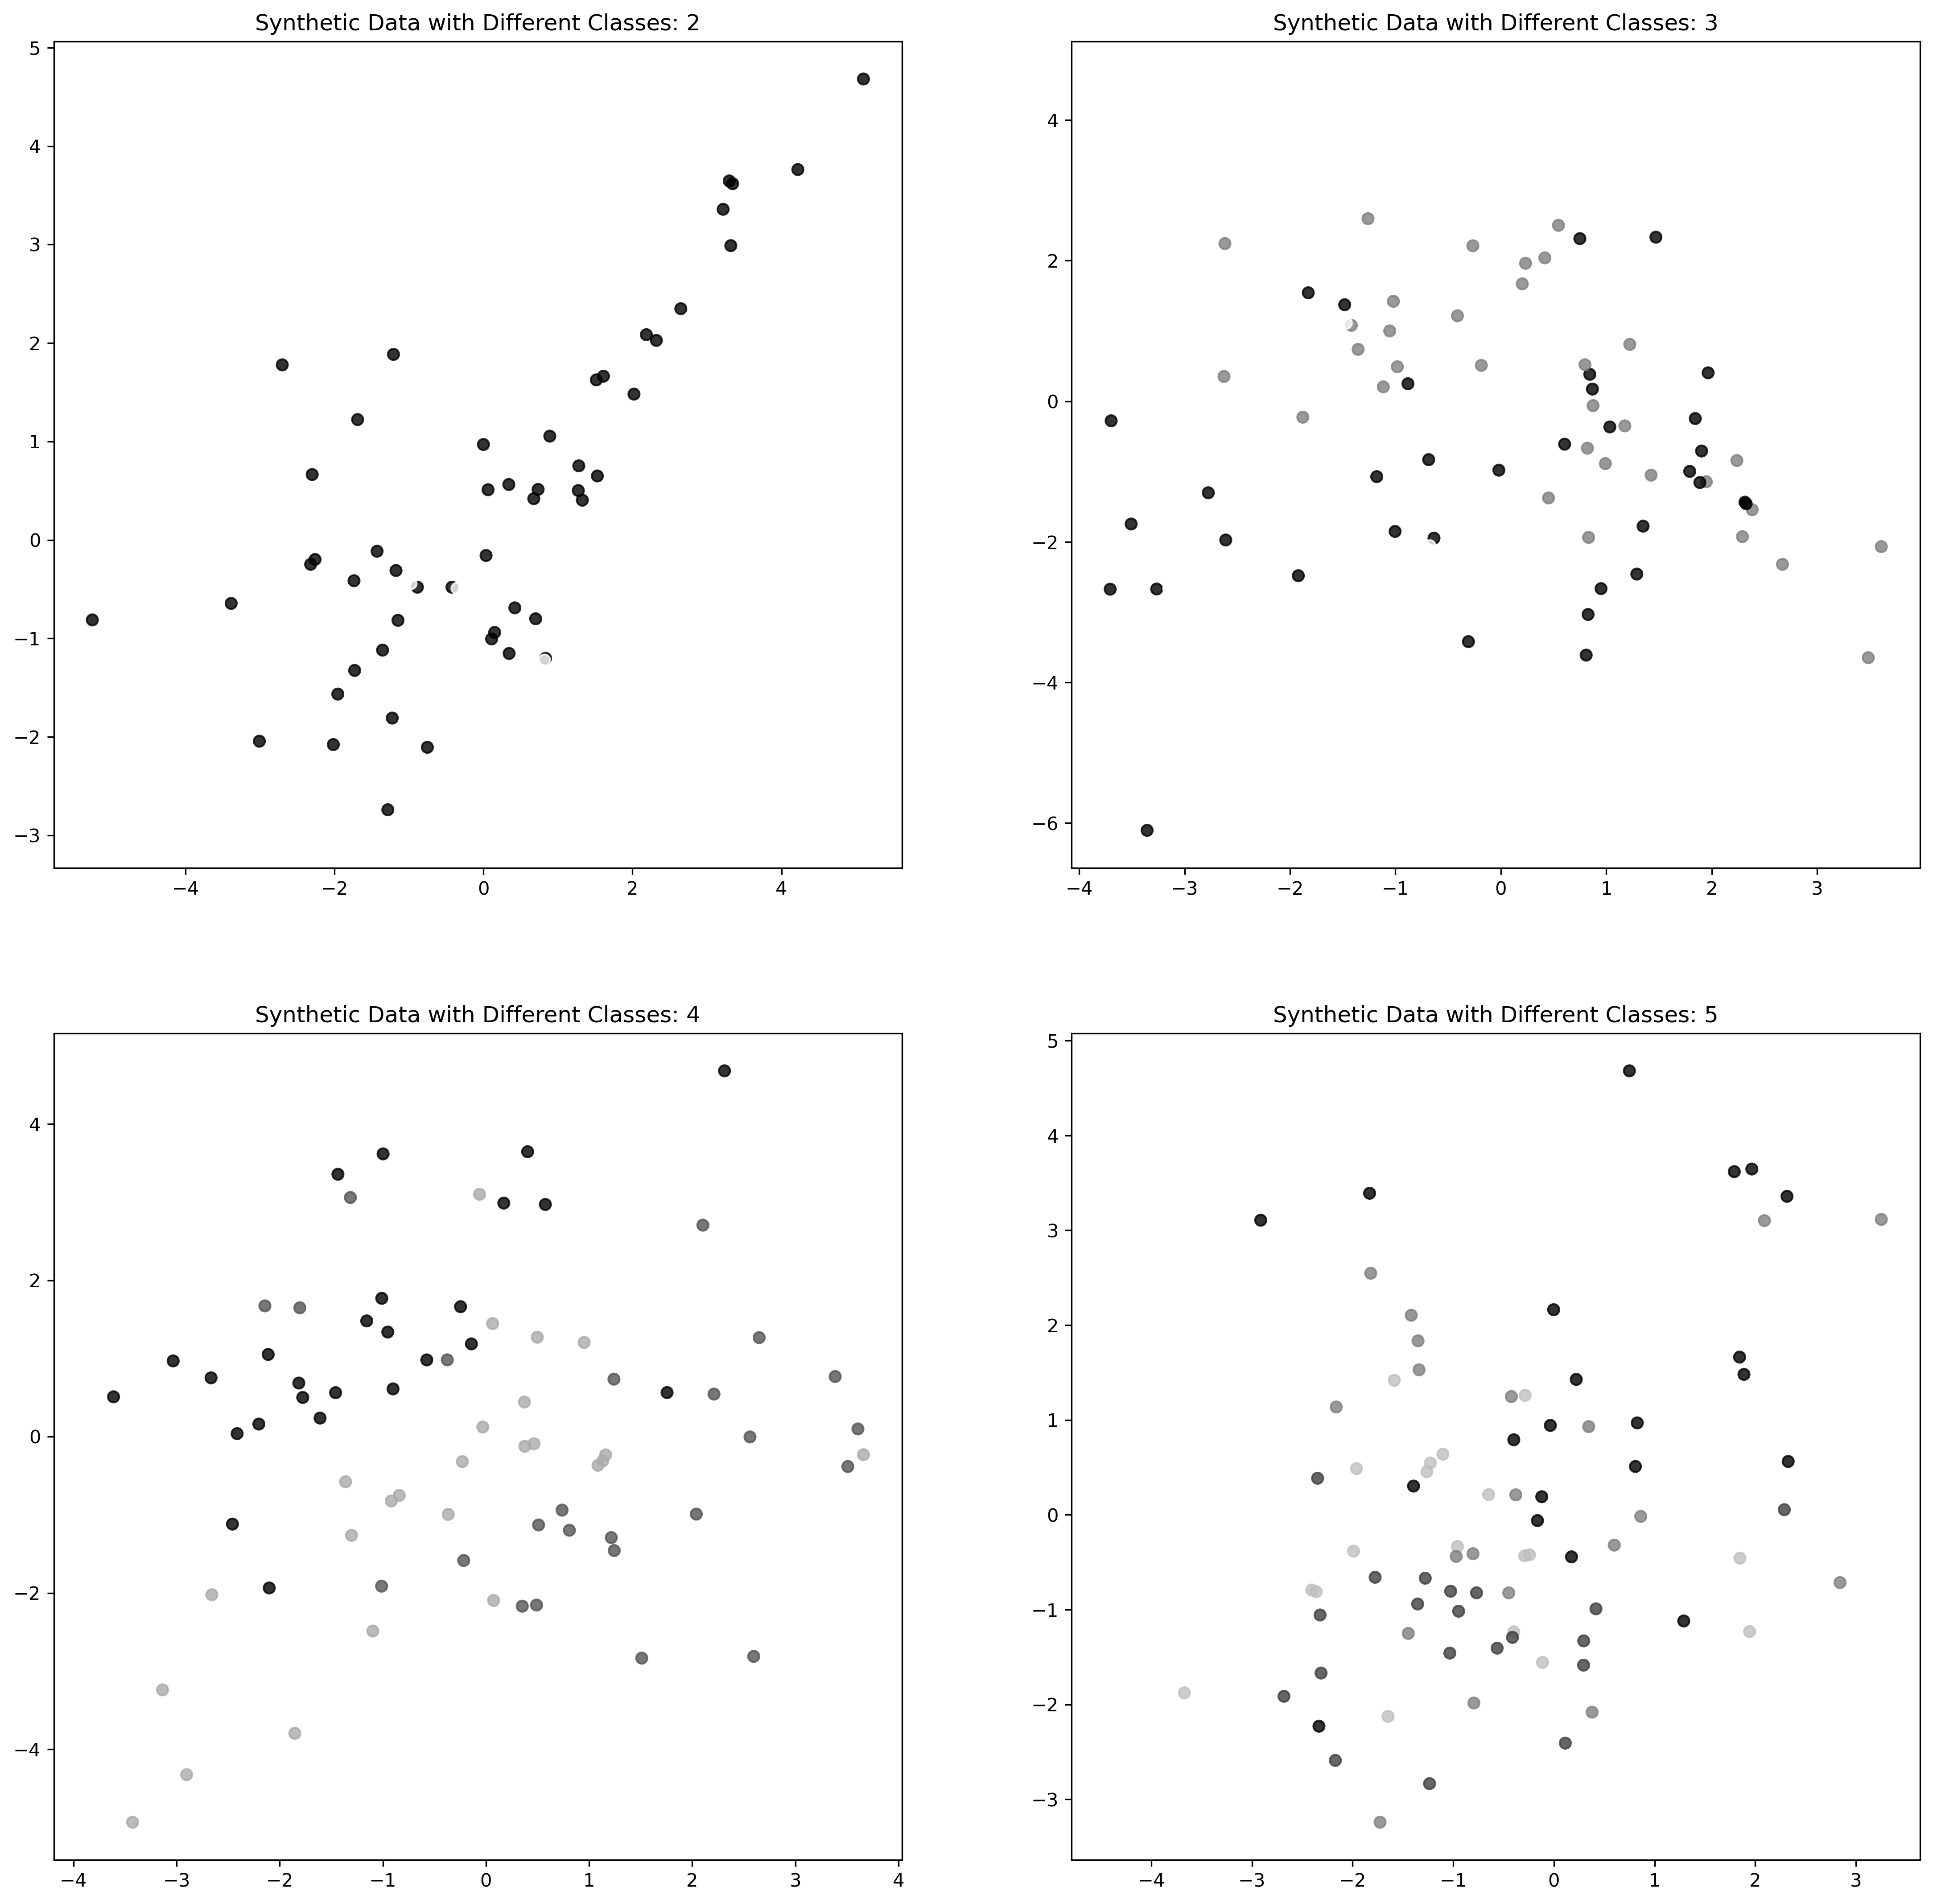

In [24]:
plt.figure(figsize=(18, 18))
k = 0

for i in range(2, 6):
    X, y = make_classification(n_samples=100,
                               n_features=4,
                               n_classes=i,
                               n_redundant=0,
                               n_informative=4,
                               random_state=123)
    k+=1
    plt.subplot(2, 2, k)
    plt.scatter(X[: ,0], X[:, 1], alpha=0.8, cmap='gray', c=y)
    plt.title('Synthetic Data with Different Classes: ' + str(i))
plt.show()

## Synthetic Data for Unsupervised Learning

In [25]:
from sklearn.datasets import make_blobs

In [26]:
X, y = make_blobs(n_samples=100, centers=2, 
                      n_features=2, random_state=0)

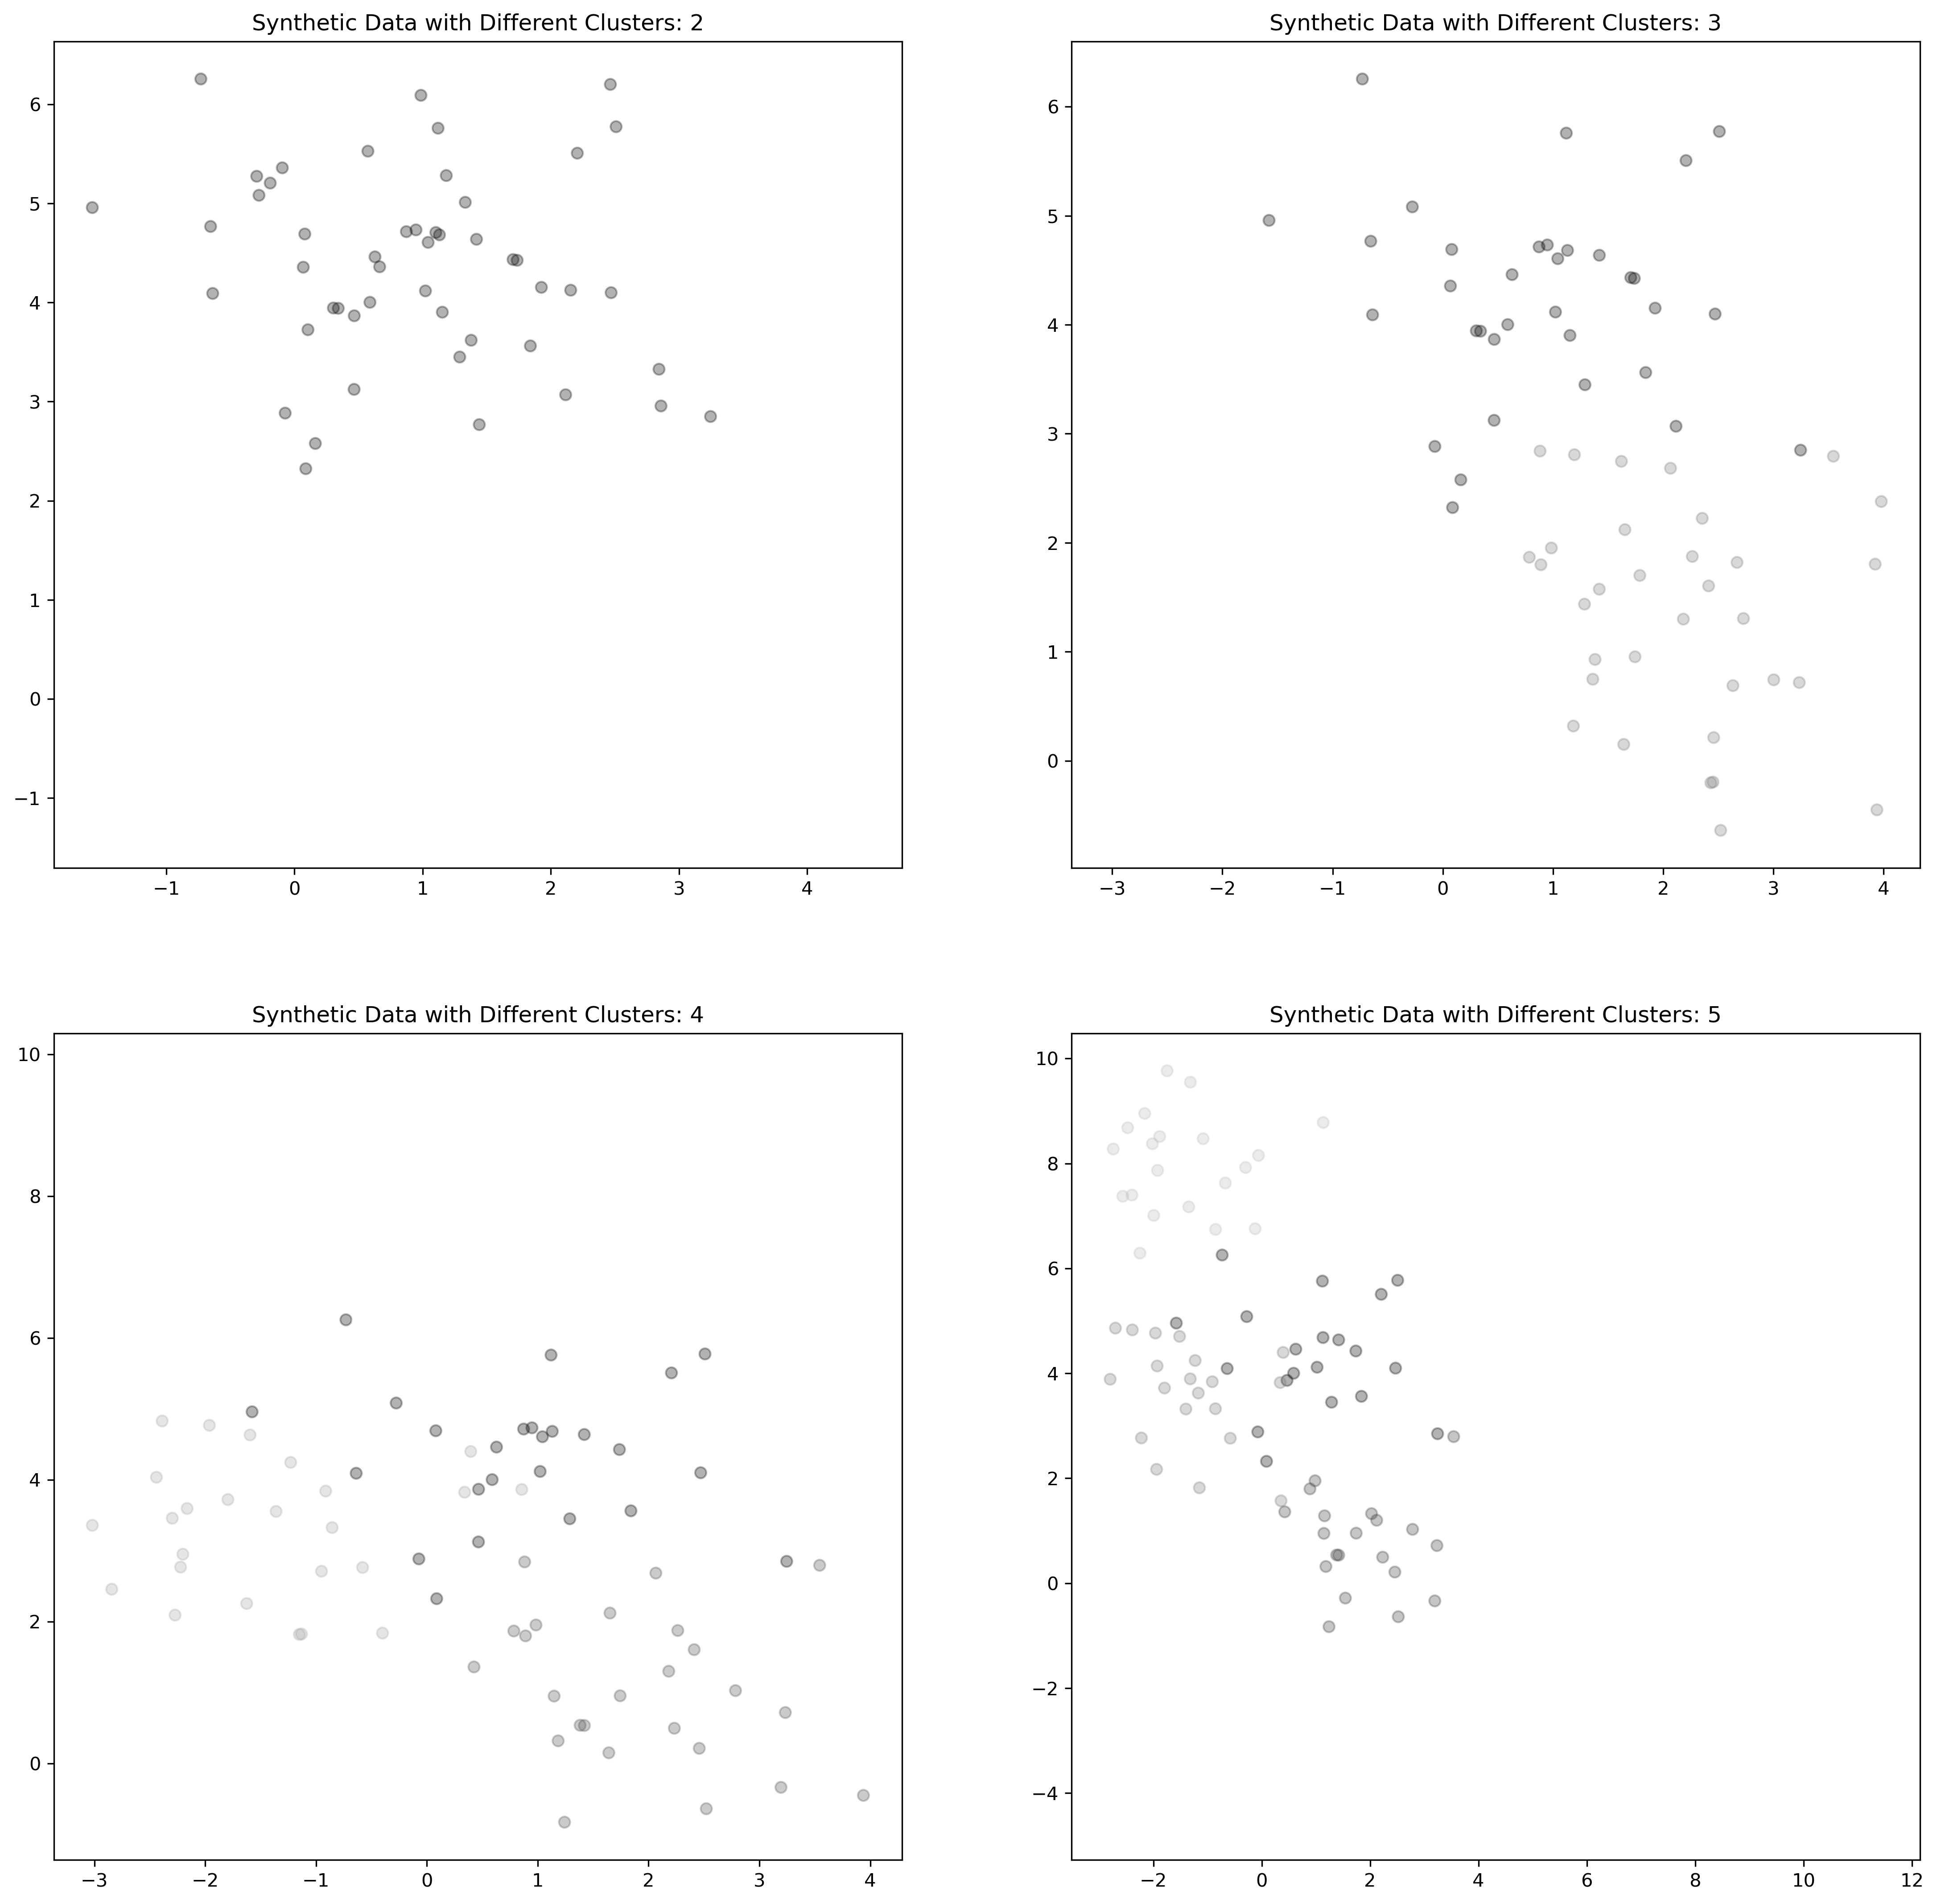

In [27]:
plt.figure(figsize=(18, 18))
k = 0
for i in range(2, 6):
    X, y = make_blobs(n_samples=100, centers=i,
                      n_features=2, random_state=0)
    k += 1
    plt.subplot(2, 2, k)
    my_scatter_plot = plt.scatter(X[:, 0], X[:, 1],
                                  alpha=0.3, cmap='gray', c=y)
    plt.title('Synthetic Data with Different Clusters: ' + str(i))
plt.show()

## HMM

In [28]:
ff = pd.read_csv('datasets/FF3.csv', skiprows=4)
ff = ff.rename(columns={'Unnamed: 0': 'Date'})
ff = ff.iloc[:-1]
ff.head()

,Date,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.24,-0.28,0.009
1,19260702,0.45,-0.32,-0.08,0.009
2,19260706,0.17,0.27,-0.35,0.009
3,19260707,0.09,-0.59,0.03,0.009
4,19260708,0.21,-0.36,0.15,0.009


In [29]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24978 entries, 0 to 24977
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    24978 non-null  object 
 1   Mkt-RF  24978 non-null  float64
 2   SMB     24978 non-null  float64
 3   HML     24978 non-null  float64
 4   RF      24978 non-null  float64
dtypes: float64(4), object(1)
memory usage: 975.8+ KB


In [30]:
ff['Date'] = pd.to_datetime(ff['Date'])
ff.set_index('Date', inplace=True)
ff_trim = ff.loc['2000-01-01':]

In [31]:
ff_trim.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2000-01-03,-0.71,0.61,-1.40,0.021
2000-01-04,-4.06,0.01,2.06,0.021
2000-01-05,-0.09,0.18,0.19,0.021
2000-01-06,-0.73,-0.42,1.27,0.021
2000-01-07,3.21,-0.49,-1.42,0.021


In [32]:
ticker = 'SPY'
start = datetime.datetime(2000, 1, 3)
end = datetime.datetime(2021, 4, 30)
SP_ETF = yf.download(ticker, start, end, interval='1d').Close

[*********************100%***********************]  1 of 1 completed


In [33]:
ff_merge = pd.merge(ff_trim, SP_ETF, how='inner', on='Date')

In [34]:
SP = pd.DataFrame()
SP['Close']= ff_merge['Close']

In [35]:
SP['return'] = (SP['Close'] / SP['Close'].shift(1))-1

In [36]:
#pip install hmmlearn

In [37]:
from hmmlearn import hmm

In [38]:
hmm_model = hmm.GaussianHMM(n_components=3,
                            covariance_type="full",
                            n_iter=100)

In [ ]:
hmm_model.fit(np.array(SP['return'].dropna()).reshape(-1, 1))
hmm_predict = hmm_model.predict(np.array(SP['return'].dropna())
                                .reshape(-1, 1))
df_hmm = pd.DataFrame(hmm_predict)

In [ ]:
ret_merged = pd.concat([df_hmm,SP['return'].dropna().reset_index()],
                       axis=1)
ret_merged.drop('Date',axis=1, inplace=True)
ret_merged.rename(columns={0:'states'}, inplace=True)
ret_merged.dropna().head()

In [ ]:
ret_merged['states'].value_counts()

In [1]:
state_means = []
state_std = []

for i in range(3):
    state_means.append(ret_merged[ret_merged.states == i]['return']
                       .mean())
    state_std.append(ret_merged[ret_merged.states == i]['return']
                     .std())
print('State Means are: {}'.format(state_means))
print('State Standard Deviations are: {}'.format(state_std))

NameError: name 'ret_merged' is not defined

In [ ]:
print(f'HMM means\n {hmm_model.means_}')
print(f'HMM covariances\n {hmm_model.covars_}')
print(f'HMM transition matrix\n {hmm_model.transmat_}')
print(f'HMM initial probability\n {hmm_model.startprob_}')

In [ ]:
sp_ret = SP['return'].dropna().values.reshape(-1,1)
n_components = np.arange(1, 10)
clusters = [hmm.GaussianHMM(n_components=n, 
                            covariance_type="full").fit(sp_ret)
           for n in n_components]
plt.plot(n_components, [m.score(np.array(SP['return'].dropna())\
                                .reshape(-1,1)) for m in clusters])
plt.title('Optimum Number of States')
plt.xlabel('n_components')
plt.ylabel('Log Likelihood')

In [ ]:
hmm_model = hmm.GaussianHMM(n_components=3, 
                        covariance_type="full", 
                        random_state=123).fit(sp_ret)
hidden_states = hmm_model.predict(sp_ret)

In [ ]:
from matplotlib.dates import YearLocator, MonthLocator
from matplotlib import cm

In [ ]:
df_sp_ret = SP['return'].dropna()

hmm_model = hmm.GaussianHMM(n_components=3, 
                            covariance_type="full", 
                            random_state=123).fit(sp_ret)

hidden_states = hmm_model.predict(sp_ret)

fig, axs = plt.subplots(hmm_model.n_components, sharex=True,
                        sharey=True, figsize=(12, 9))
colors = cm.gray(np.linspace(0, 0.7, hmm_model.n_components))

for i, (ax, color) in enumerate(zip(axs, colors)):
    mask = hidden_states == i
    ax.plot_date(df_sp_ret.index.values[mask],
                 df_sp_ret.values[mask],
                 ".-", c=color)
    ax.set_title("Hidden state {}".format(i + 1), fontsize=16)
    ax.xaxis.set_minor_locator(MonthLocator())
plt.tight_layout()

In [ ]:
ret_merged.groupby('states')['return'].mean()

## Fama-French Model vs. HMM

In [ ]:
ff_merge['return'] = ff_merge['Close'].pct_change()
ff_merge.dropna(inplace=True)

In [ ]:
split = int(len(ff_merge) * 0.9)
train_ff= ff_merge.iloc[:split].dropna()
test_ff = ff_merge.iloc[split:].dropna()

In [ ]:
hmm_model = hmm.GaussianHMM(n_components=3,
                            covariance_type="full",
                            n_iter=100, init_params=" ")

In [ ]:
predictions = []

for i in range(len(test_ff)):
    hmm_model.fit(train_ff)
    adjustment = np.dot(hmm_model.transmat_, hmm_model.means_)
    predictions.append(test_ff.iloc[i] + adjustment[0])
predictions = pd.DataFrame(predictions)

In [ ]:
std_dev = predictions['return'].std()
sharpe = predictions['return'].mean() / std_dev
print('Sharpe ratio with HMM is {:.4f}'.format(sharpe))

## Fama-French Model with OLS

In [2]:
import statsmodels.api as sm

In [3]:
Y = train_ff['return']
X = train_ff[['Mkt-RF', 'SMB', 'HML']]

NameError: name 'train_ff' is not defined

In [ ]:
model = sm.OLS(Y, X)
ff_ols = model.fit()
print(ff_ols.summary())

In [ ]:
ff_pred = ff_ols.predict(test_ff[["Mkt-RF", "SMB", "HML"]])
ff_pred.head()

In [ ]:
std_dev = ff_pred.std()
sharpe = ff_pred.mean() / std_dev
print('Sharpe ratio with FF 3 factor model is {:.4f}'.format(sharpe))

In [ ]:
split = int(len(SP['return']) * 0.9)
train_ret_SP = SP['return'].iloc[split:].dropna()
test_ret_SP = SP['return'].iloc[:split].dropna()

In [ ]:
hmm_model = hmm.GaussianHMM(n_components=3,
                            covariance_type="full",
                            n_iter=100)
hmm_model.fit(np.array(train_ret_SP).reshape(-1, 1))
hmm_predict_vol = hmm_model.predict(np.array(test_ret_SP)
                                    .reshape(-1, 1))
pd.DataFrame(hmm_predict_vol).value_counts()

## Synthetic Data Generation and Hidden Markov

In [ ]:
startprob = hmm_model.startprob_
transmat = hmm_model.transmat_
means = hmm_model.means_ 
covars = hmm_model.covars_

In [ ]:
syn_hmm = hmm.GaussianHMM(n_components=3, covariance_type="full")

In [ ]:
syn_hmm.startprob_ = startprob
syn_hmm.transmat_ = transmat 
syn_hmm.means_ = means 
syn_hmm.covars_ = covars

In [ ]:
syn_data, _ = syn_hmm.sample(n_samples=1000)

In [ ]:
plt.hist(syn_data)
plt.title('Histogram of Synthetic Data')
plt.show()

In [ ]:
plt.plot(syn_data, "--")
plt.title('Line Plot of Synthetic Data')
plt.show()